MICRODADOS DO ENEM 2020 QUE EU FIZ UMA SEPARAÇÃO COM A MÉDIA DAS NOTAS POR DISCIPLINAS,REGIÃO, SEXO, ETNIA.TAMBÉM A JUNÇÃO DOS DOIS DADOS PARA MELHOR ANALIZE. Os microdados do Enem são o menor nível de desagregação de dados recolhidos por meio do exame. Eles atendem a demanda por informações específicas ao disponibilizar as provas, os gabaritos, as informações sobre os itens, as notas e o questionário respondido pelos inscritos no Enem.



### ⭐⭐⭐⭐⭐ENGENAHRIA DE DADOS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#carregando os dados em CSV fazendo a ingestão de dados da planilha e também codificando para que não haja problemas de formato
#sep = Separação por ; dos dados // encoding = codificador dos dados da planilha.

print(os.listdir("../input"))

dados = pd.read_csv("../input/microdadosenem-2020/MICRODADOS_ENEM_2020.csv", sep=';', encoding="ISO-8859-1")

['brazilian-national-test-enem-from-2016-2020', 'ml-olympiad-quality-education-eda-modelagem', 'microdados-enem', 'microdadosenem-2020']


In [3]:
#Filtrando algumas colunas para melhor analise do conjunto de dados.

dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

In [4]:
#Como há muitas colunas desnecessarias, realizamos um tratamento na tapela de dados deixando somente o essencial.

DadosEnem = ['TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_COR_RACA',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'NU_NOTA_REDACAO','NU_NOTA_MT',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO']

In [5]:
#Realizamos a conversão de dados numéricos em dados rotulados (ETL - Tratamento).

cor = {
               0 : "Não Declarado",
               1 : "Branco",
               2 : "Preto",
               3:  "Pardo",
               4 : "Amarelo",
               5 : "Indígena"
               }
               
                 
dados["TP_COR_RACA"] = dados["TP_COR_RACA"].replace(cor)

print(cor)

{0: 'Não Declarado', 1: 'Branco', 2: 'Preto', 3: 'Pardo', 4: 'Amarelo', 5: 'Indígena'}


In [6]:
#Utilizando a função filtro, somente retornará valores das colunas selecionadas (ETL - Tratamento).

Data = dados.filter(DadosEnem)

In [7]:
Data.head(3)

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,...,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_REDACAO,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
0,11,F,Preto,1,11,1,NaN,0,NaN,NaN,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,11,M,Pardo,1,11,1,NaN,0,NaN,NaN,...,1,1,1,1,580.0,711.3,604.1,661.7,595.3,580.0
2,4,F,Pardo,2,0,2,1.0,0,2927408.0,Salvador,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
len(dados.columns)

76

In [9]:
# Contagem de número de inscritos 

n = len(pd.unique(dados['NU_INSCRICAO']))
  
print("No.of.unique values :", 
      n)

No.of.unique values : 5783109


In [10]:
percent_missing = Data.isnull().sum() * 100 / len(Data)
missing_value_df = pd.DataFrame({'column_name': Data.columns,
                                 'percent_missing': percent_missing})

In [11]:
# percentual de valores nulos por recurso 

missing_value_df

,column_name,percent_missing
TP_FAIXA_ETARIA,TP_FAIXA_ETARIA,0.000000
TP_SEXO,TP_SEXO,0.000000
TP_COR_RACA,TP_COR_RACA,0.000000
TP_ST_CONCLUSAO,TP_ST_CONCLUSAO,0.000000
TP_ANO_CONCLUIU,TP_ANO_CONCLUIU,0.000000
TP_ESCOLA,TP_ESCOLA,0.000000
TP_ENSINO,TP_ENSINO,77.461155
IN_TREINEIRO,IN_TREINEIRO,0.000000
CO_MUNICIPIO_ESC,CO_MUNICIPIO_ESC,84.358431
NO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,84.358431


In [12]:
#Vamos tirar todos os valores NAN(NOT A NUMBER), que são os valores de quem não foi.

Data = Data.dropna()

In [13]:
#Vamos pegar os valores das 5 notas do enem e fazer a média para uma nota geral.

Data = Data.assign(media=0)
Data.head(1)

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,...,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_REDACAO,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,media
3,2,M,Pardo,2,0,2,1.0,0,3547304.0,Santana de Parnaíba,...,1,1,1,760.0,759.4,620.8,675.0,624.2,760.0,0


In [14]:
#Com a coluna média adicionada, vamos faze-lá funcionar.
#Fazer o somatorio das colunas das 5 notas das diferentes disciplinas e / 5.

lista = ['NU_NOTA_MT',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO','media']
ListaNotas = dados.filter(items=lista)

In [15]:
ListaNotas = ListaNotas.assign(media=0)
ListaNotas.head(5)

,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,media
0,NaN,NaN,NaN,NaN,NaN,0
1,711.3,604.1,661.7,595.3,580.0,0
2,NaN,NaN,NaN,NaN,NaN,0
3,759.4,620.8,675.0,624.2,760.0,0
4,NaN,NaN,NaN,NaN,NaN,0


In [16]:
ListaNotas.dropna()

,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,media
1,711.3,604.1,661.7,595.3,580.0,0
3,759.4,620.8,675.0,624.2,760.0,0
5,526.7,498.1,604.7,505.4,700.0,0
7,753.2,604.6,604.8,562.1,600.0,0
8,448.5,439.7,383.5,486.2,600.0,0
...,...,...,...,...,...,...
5783103,469.1,547.3,613.3,596.4,660.0,0
5783104,725.7,508.3,661.4,658.3,900.0,0
5783105,719.5,570.5,646.1,607.2,660.0,0
5783106,648.1,418.8,597.5,674.5,660.0,0


In [17]:
dados['media'] = (ListaNotas['NU_NOTA_CH'] + ListaNotas['NU_NOTA_CN']+ ListaNotas['NU_NOTA_MT'] + 
                       ListaNotas['NU_NOTA_REDACAO'] + ListaNotas['NU_NOTA_LC'])//5

In [18]:
ListaNotas.head(5)

,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,media
0,NaN,NaN,NaN,NaN,NaN,0
1,711.3,604.1,661.7,595.3,580.0,0
2,NaN,NaN,NaN,NaN,NaN,0
3,759.4,620.8,675.0,624.2,760.0,0
4,NaN,NaN,NaN,NaN,NaN,0


In [19]:
ListaNotas.dropna()

,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,media
1,711.3,604.1,661.7,595.3,580.0,0
3,759.4,620.8,675.0,624.2,760.0,0
5,526.7,498.1,604.7,505.4,700.0,0
7,753.2,604.6,604.8,562.1,600.0,0
8,448.5,439.7,383.5,486.2,600.0,0
...,...,...,...,...,...,...
5783103,469.1,547.3,613.3,596.4,660.0,0
5783104,725.7,508.3,661.4,658.3,900.0,0
5783105,719.5,570.5,646.1,607.2,660.0,0
5783106,648.1,418.8,597.5,674.5,660.0,0


### ⭐⭐⭐⭐⭐Análise de Dados

In [20]:
#Media de nota entre sexo masculino e feminino.
NotaSexo = ['TP_SEXO','media']

NotaSexo = dados.filter(items=NotaSexo)

NotaSexo

,TP_SEXO,media
0,F,NaN
1,M,630.0
2,F,NaN
3,M,687.0
4,F,NaN
...,...,...
5783104,F,690.0
5783105,M,640.0
5783106,F,599.0
5783107,F,NaN


In [21]:
NotaSexo = NotaSexo.dropna()

In [22]:
mediana = NotaSexo.groupby('TP_SEXO').median()
mediana

,media
TP_SEXO,
F,509.0
M,529.0


In [23]:
NotaSexo.groupby('TP_SEXO').describe()

media                                                        
             count        mean        std  min    25%    50%    75%    max
TP_SEXO                                                                   
F        1564051.0  520.754447  89.805201  0.0  455.0  509.0  579.0  851.0
M        1024630.0  534.234753  93.148418  0.0  467.0  529.0  597.0  858.0

In [24]:

ListaNotas.groupby('NU_NOTA_MT').describe()

NU_NOTA_CN                                                  \
                count        mean         std    min      25%     50%   
NU_NOTA_MT                                                              
0.0             913.0  153.761227  203.934652    0.0    0.000    0.00   
327.1           424.0  415.754717   75.177925    0.0  381.925  415.85   
327.2           121.0  417.276860   65.055991    0.0  378.000  410.00   
327.3           188.0  420.877128   41.750109  333.0  389.100  414.55   
327.4           149.0  423.929530   46.357218  337.4  388.200  425.40   
...               ...         ...         ...    ...      ...     ...   
965.6             1.0  718.800000         NaN  718.8  718.800  718.80   
966.3             7.0  766.214286   36.933202  713.1  745.450  765.70   
966.6            52.0  720.319231   50.380708  556.6  691.325  722.15   
974.3             2.0  700.350000   57.204939  659.9  680.125  700.35   
975.0           224.0  711.650893   97.180525    0.0  689.175  733.25   

                           NU_NOTA_CH              ... NU_NOTA_REDACAO  \
                75%    max      count        mean  ...             75%   
NU_NOTA_MT                                         ...                   
0.0         364.800  672.7      635.0  408.134961  ...           560.0   
327.1       456.600  595.9      415.0  413.988193  ...           560.0   
327.2       463.900  563.0      118.0  424.811864  ...           540.0   
327.3       449.825  550.1      186.0  428.552688  ...           540.0   
327.4       449.900  562.3      147.0  440.559864  ...           560.0   
...             ...    ...        ...         ...  ...             ...   
965.6       718.800  718.8        1.0  738.700000  ...           900.0   
966.3       788.300  817.2        7.0  739.571429  ...           890.0   
966.6       751.925  821.2       52.0  721.184615  ...           940.0   
974.3       720.575  740.8        2.0  670.100000  ...           935.0   
975.0       757.000  854.8      219.0  727.610502  ...           940.0   

                    media                                     
               max  count mean  std  min  25%  50%  75%  max  
NU_NOTA_MT                                                    
0.0          980.0  913.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
327.1        920.0  424.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
327.2        760.0  121.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
327.3        880.0  188.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
327.4        780.0  149.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...            ...    ...  ...  ...  ...  ...  ...  ...  ...  
965.6        900.0    1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0  
966.3        980.0    7.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
966.6        980.0   52.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
974.3        940.0    2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
975.0       1000.0  224.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[6233 rows x 40 columns]

In [25]:
ListaNotas.groupby('NU_NOTA_CN').describe()

NU_NOTA_MT                                                  \
                count        mean         std    min      25%     50%   
NU_NOTA_CN                                                              
0.0             705.0  116.111064  255.402075    0.0    0.000    0.00   
323.9             1.0  485.100000         NaN  485.1  485.100  485.10   
324.0             4.0  391.600000   17.529404  373.8  379.050  390.20   
324.1             2.0  403.900000    8.343860  398.0  400.950  403.90   
324.3             2.0  418.100000    8.768124  411.9  415.000  418.10   
...               ...         ...         ...    ...      ...     ...   
835.3             1.0  771.400000         NaN  771.4  771.400  771.40   
838.7             1.0  841.500000         NaN  841.5  841.500  841.50   
843.3             2.0  909.050000   46.881180  875.9  892.475  909.05   
851.1             1.0  919.500000         NaN  919.5  919.500  919.50   
854.8             4.0  958.975000   11.788236  946.9  953.125  957.00   

                           NU_NOTA_CH              ... NU_NOTA_REDACAO         \
                75%    max      count        mean  ...             75%    max   
NU_NOTA_CN                                         ...                          
0.0           0.000  975.0      412.0  399.265291  ...           620.0  980.0   
323.9       485.100  485.1        1.0  333.900000  ...           440.0  440.0   
324.0       402.750  412.2        4.0  427.175000  ...           490.0  520.0   
324.1       406.850  409.8        2.0  453.850000  ...           515.0  540.0   
324.3       421.200  424.3        2.0  395.800000  ...           360.0  480.0   
...             ...    ...        ...         ...  ...             ...    ...   
835.3       771.400  771.4        1.0  723.000000  ...           740.0  740.0   
838.7       841.500  841.5        1.0  723.000000  ...           840.0  840.0   
843.3       925.625  942.2        2.0  730.500000  ...           935.0  940.0   
851.1       919.500  919.5        1.0  755.700000  ...           780.0  780.0   
854.8       962.850  975.0        4.0  792.725000  ...           875.0  920.0   

            media                                     
            count mean  std  min  25%  50%  75%  max  
NU_NOTA_CN                                            
0.0         705.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
323.9         1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0  
324.0         4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
324.1         2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
324.3         2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...           ...  ...  ...  ...  ...  ...  ...  ...  
835.3         1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0  
838.7         1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0  
843.3         2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
851.1         1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0  
854.8         4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[4779 rows x 40 columns]

In [26]:
ListaNotas.groupby('NU_NOTA_CH').describe()

NU_NOTA_MT                                                  \
                count        mean         std    min      25%     50%   
NU_NOTA_CH                                                              
0.0            2311.0  441.667330  133.953991    0.0  382.950  433.60   
313.7             1.0  416.200000         NaN  416.2  416.200  416.20   
314.0             0.0         NaN         NaN    NaN      NaN     NaN   
314.1             1.0  474.200000         NaN  474.2  474.200  474.20   
315.2             0.0         NaN         NaN    NaN      NaN     NaN   
...               ...         ...         ...    ...      ...     ...   
843.7             2.0  903.250000  101.469823  831.5  867.375  903.25   
843.9             3.0  857.400000   26.400568  831.1  844.150  857.20   
844.0             6.0  839.633333   90.996894  656.8  859.500  870.65   
848.0             0.0         NaN         NaN    NaN      NaN     NaN   
862.6            20.0  868.670000   56.402427  748.2  816.450  884.20   

                           NU_NOTA_CN              ... NU_NOTA_REDACAO         \
                75%    max      count        mean  ...             75%    max   
NU_NOTA_CH                                         ...                          
0.0         513.450  945.8     2311.0  437.356599  ...           520.0  980.0   
313.7       416.200  416.2        1.0  481.400000  ...           635.0  780.0   
314.0           NaN    NaN        0.0         NaN  ...           520.0  520.0   
314.1       474.200  474.2        1.0  481.100000  ...           480.0  480.0   
315.2           NaN    NaN        0.0         NaN  ...           580.0  580.0   
...             ...    ...        ...         ...  ...             ...    ...   
843.7       939.125  975.0        2.0  749.200000  ...           965.0  980.0   
843.9       870.550  883.9        3.0  696.333333  ...           940.0  960.0   
844.0       876.850  905.0        6.0  713.000000  ...           910.0  940.0   
848.0           NaN    NaN        0.0         NaN  ...           920.0  920.0   
862.6       906.750  958.8       20.0  732.410000  ...           960.0  980.0   

             media                                     
             count mean  std  min  25%  50%  75%  max  
NU_NOTA_CH                                             
0.0         5067.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
313.7          2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
314.0          1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0  
314.1          1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0  
315.2          1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0  
...            ...  ...  ...  ...  ...  ...  ...  ...  
843.7          2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
843.9          3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
844.0          6.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
848.0          1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0  
862.6         20.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[4882 rows x 40 columns]

In [27]:
ListaNotas.groupby('NU_NOTA_LC').describe()

NU_NOTA_MT                                                          \
                count        mean         std    min      25%    50%      75%   
NU_NOTA_LC                                                                      
0.0             744.0  421.703226  174.153648    0.0  378.775  430.7  513.975   
288.7             0.0         NaN         NaN    NaN      NaN    NaN      NaN   
288.9             1.0  487.500000         NaN  487.5  487.500  487.5  487.500   
289.6             3.0  507.466667   50.053005  450.5  489.000  527.5  535.950   
290.1             1.0  530.800000         NaN  530.8  530.800  530.8  530.800   
...               ...         ...         ...    ...      ...    ...      ...   
783.9             1.0  760.400000         NaN  760.4  760.400  760.4  760.400   
786.5             1.0  807.400000         NaN  807.4  807.400  807.4  807.400   
787.4             1.0  671.600000         NaN  671.6  671.600  671.6  671.600   
790.3             1.0  844.300000         NaN  844.3  844.300  844.3  844.300   
801.1             1.0  831.900000         NaN  831.9  831.900  831.9  831.900   

                  NU_NOTA_CN              ... NU_NOTA_REDACAO          media  \
              max      count        mean  ...             75%    max   count   
NU_NOTA_LC                                ...                                  
0.0         920.8      744.0  411.380242  ...           420.0  980.0  2349.0   
288.7         NaN        0.0         NaN  ...             0.0    0.0     1.0   
288.9       487.5        1.0  342.100000  ...           400.0  520.0     5.0   
289.6       544.4        3.0  401.800000  ...           540.0  580.0     3.0   
290.1       530.8        1.0  464.400000  ...           480.0  480.0     1.0   
...           ...        ...         ...  ...             ...    ...     ...   
783.9       760.4        1.0  640.600000  ...           740.0  740.0     1.0   
786.5       807.4        1.0  661.500000  ...           900.0  900.0     1.0   
787.4       671.6        1.0  571.600000  ...           740.0  740.0     1.0   
790.3       844.3        1.0  652.300000  ...           900.0  900.0     1.0   
801.1       831.9        1.0  729.200000  ...           900.0  900.0     1.0   

                                               
           mean  std  min  25%  50%  75%  max  
NU_NOTA_LC                                     
0.0         0.0  0.0  0.0  0.0  0.0  0.0  0.0  
288.7       0.0  NaN  0.0  0.0  0.0  0.0  0.0  
288.9       0.0  0.0  0.0  0.0  0.0  0.0  0.0  
289.6       0.0  0.0  0.0  0.0  0.0  0.0  0.0  
290.1       0.0  NaN  0.0  0.0  0.0  0.0  0.0  
...         ...  ...  ...  ...  ...  ...  ...  
783.9       0.0  NaN  0.0  0.0  0.0  0.0  0.0  
786.5       0.0  NaN  0.0  0.0  0.0  0.0  0.0  
787.4       0.0  NaN  0.0  0.0  0.0  0.0  0.0  
790.3       0.0  NaN  0.0  0.0  0.0  0.0  0.0  
801.1       0.0  NaN  0.0  0.0  0.0  0.0  0.0  

[4578 rows x 40 columns]

In [28]:
ListaNotas.groupby('NU_NOTA_REDACAO').describe()

NU_NOTA_MT                                                  \
                     count        mean         std    min      25%     50%   
NU_NOTA_REDACAO                                                              
0.0                58885.0  445.240963   85.437771    0.0  384.900  427.60   
40.0                  51.0  395.647059   47.906915  327.4  359.100  393.80   
60.0                  50.0  405.524000   36.824158  329.1  374.850  410.85   
80.0                  86.0  403.609302   52.113184  328.3  363.675  396.20   
100.0                 57.0  394.547368   35.908247  336.7  362.300  397.80   
120.0                140.0  405.358571   55.683631  327.6  366.575  396.30   
140.0                188.0  400.755851   49.215620  327.2  366.350  393.30   
160.0                543.0  412.060221   57.102933  328.0  369.800  402.10   
180.0                795.0  411.679874   58.979068    0.0  370.550  404.40   
200.0               2267.0  422.104191   63.418457  327.1  376.050  410.60   
220.0               3601.0  425.796418   64.228526    0.0  380.000  415.60   
240.0               9857.0  432.542548   70.159058    0.0  380.900  419.80   
260.0              14345.0  439.435657   74.583620    0.0  385.000  425.10   
280.0              29940.0  444.869719   76.934041    0.0  386.675  430.75   
300.0              34935.0  453.569237   81.114209    0.0  391.200  438.90   
320.0              62801.0  462.767935   84.474860    0.0  397.100  448.20   
340.0              71026.0  472.604615   88.366213    0.0  403.000  458.50   
360.0             104254.0  481.479136   92.816765    0.0  408.000  467.40   
380.0              53047.0  480.862524   94.734921    0.0  405.700  464.90   
400.0              57188.0  472.783152   94.567500    0.0  399.075  454.15   
420.0              38469.0  462.549975   90.728154    0.0  393.300  444.30   
440.0              61730.0  463.355027   89.953467    0.0  394.800  445.10   
460.0              58917.0  462.037575   87.451231    0.0  394.900  445.60   
480.0              88612.0  465.587238   87.453963    0.0  398.200  450.10   
500.0              83323.0  470.507890   89.211798    0.0  401.400  455.00   
520.0             125432.0  476.100376   90.758910    0.0  405.200  461.20   
540.0             121995.0  484.534360   93.440614    0.0  410.900  470.40   
560.0             159521.0  493.102383   95.603330    0.0  417.100  480.50   
580.0             135583.0  503.030415   98.414267    0.0  424.100  492.80   
600.0             146262.0  511.861776  100.619157    0.0  431.400  503.40   
620.0             105537.0  522.266831  102.941410    0.0  439.900  516.60   
640.0             108093.0  529.535318  104.461137    0.0  446.200  526.10   
660.0              72606.0  538.104334  105.379513    0.0  454.500  536.80   
680.0              80685.0  544.504325  107.064069    0.0  460.600  544.60   
700.0              56311.0  553.262576  108.432295    0.0  468.300  554.80   
720.0              66038.0  558.858575  108.652116    0.0  474.900  562.20   
740.0              47378.0  568.164473  109.604556    0.0  485.000  572.55   
760.0              58540.0  573.400355  110.641327    0.0  490.200  578.10   
780.0              43034.0  583.038546  111.723187    0.0  501.000  589.00   
800.0              54737.0  589.244787  112.510608    0.0  507.800  595.50   
820.0              42449.0  598.526460  113.610253    0.0  517.000  605.10   
840.0              52822.0  604.422587  114.118371    0.0  525.700  610.70   
860.0              41742.0  615.784835  114.564390    0.0  538.600  621.60   
880.0              53318.0  626.318221  116.223603    0.0  549.725  632.70   
900.0              44287.0  639.562477  115.725563    0.0  565.300  645.20   
920.0              52901.0  656.493788  117.735586    0.0  582.300  662.00   
940.0              41313.0  672.296427  116.222868  327.5  599.900  678.10   
960.0              30805.0  696.492599  113.738506    0.0  625.100  703.50   
980.0              12158.0  722.110997

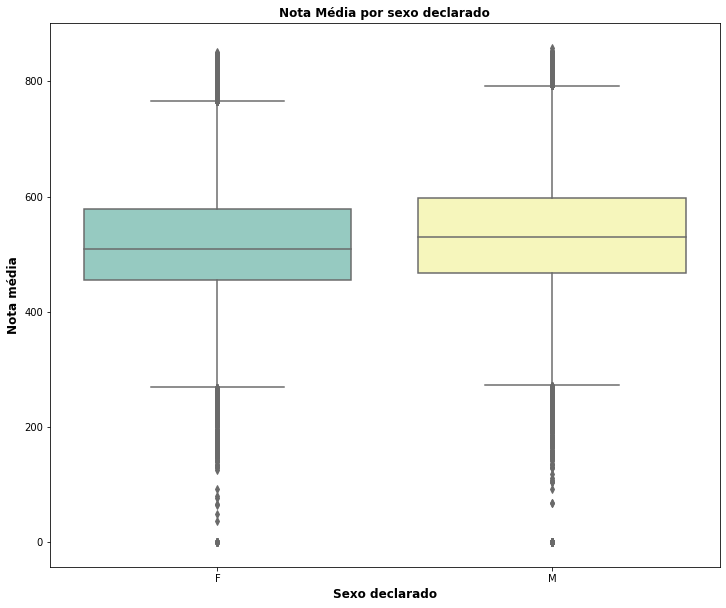

In [29]:
#Agora vamos analisar graficamente os dados das medias entre os sexos.
media = 'media'

fig, ax = plt.subplots(figsize=(12,10))

sns.boxplot(x="TP_SEXO", y=media, data=dados,
           palette="Set3", ax=ax)

ax.set_title("Nota Média por sexo declarado", fontsize=12, fontweight='bold')
ax.set_ylabel("Nota média", fontsize=12, fontweight='bold')
ax.set_xlabel("Sexo declarado", fontsize=12, fontweight='bold')

plt.show()

In [30]:
#Agora um grafico para analizarmos a media das pessoas por etnia/raça.

NotasCor = ['TP_COR_RACA','media']
NotasCor = dados.filter(items=NotasCor)

In [31]:

NotasESC = ['TP_ESCOLA','media']
NotasESC = dados.filter(items=NotasESC).copy()

In [32]:
NotasESC.head(4)

,TP_ESCOLA,media
0,1,NaN
1,1,630.0
2,2,NaN
3,2,687.0


In [33]:
NotasCor.head(4)

,TP_COR_RACA,media
0,Preto,NaN
1,Pardo,630.0
2,Pardo,NaN
3,Pardo,687.0


In [34]:
NotasCor = NotasCor.dropna()
NotasESC = NotasESC.dropna()

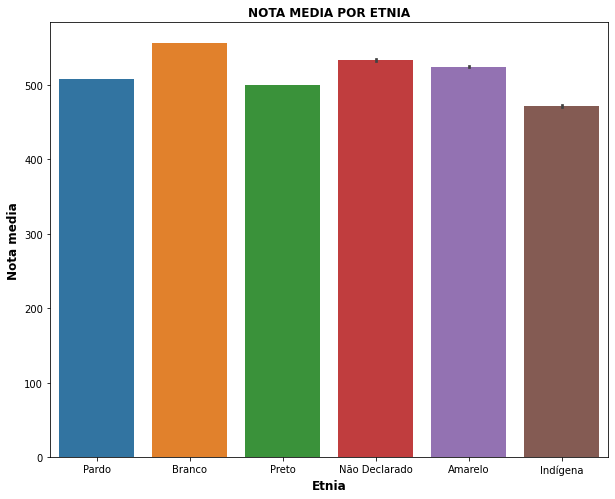

In [35]:
#Desenhando também os graficos por etnia

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(x='TP_COR_RACA', y='media', data=NotasCor)

ax.set_title("NOTA MEDIA POR ETNIA", fontsize=12, fontweight='bold')
ax.set_xlabel("Etnia", fontsize=12, fontweight='bold')
ax.set_ylabel("Nota media", fontsize=12, fontweight='bold')

plt.show()

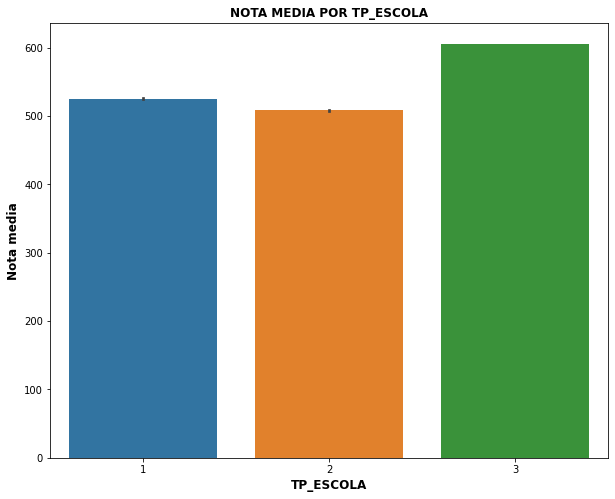

In [36]:
#Desenhando também os graficos por TP_ESCOLA

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(x='TP_ESCOLA', y='media', data=NotasESC)

ax.set_title("NOTA MEDIA POR TP_ESCOLA", fontsize=12, fontweight='bold')
ax.set_xlabel("TP_ESCOLA", fontsize=12, fontweight='bold')
ax.set_ylabel("Nota media", fontsize=12, fontweight='bold')

plt.show()

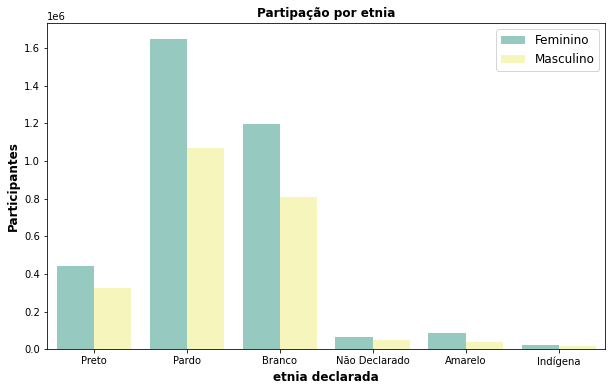

In [37]:
#Fazendo a função dos dados, conseguimos tirar.

fig, ax = plt.subplots(figsize=(10, 6))


sns.countplot(data=dados, x="TP_COR_RACA",
            hue="TP_SEXO", palette="Set3", ax=ax)


ax.set_title("Partipação por etnia", fontsize=12, fontweight='bold')
ax.set_ylabel("Participantes", fontsize=12, fontweight='bold')
ax.set_xlabel("etnia declarada", fontsize=12, fontweight='bold') 
ax.legend(["Feminino", "Masculino"], fontsize=12)